# Libraries

In [ ]:
from google.colab import drive
from bs4 import BeautifulSoup
import os
from glob import glob
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn import svm
from sklearn import ensemble
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.cluster import KMeans

# Functions

## partition_file

In [ ]:
def partition_file(archive, folder):
  ff = {}
  lcounter = 0
  fcounter = 0
  try:
    for line in archive:
      if lcounter % SIZEMINIFILE == 0:
        for cps in CODEPAGES:
          ff[cps] = open(folder+cps+ 
                str(fcounter)+FILEOUTEXT,
                "w", encoding=cps)
      cleantext = BeautifulSoup(line, "lxml").text
      for cps in CODEPAGES:
        ff[cps].write(cleantext)
      lcounter += 1
      if lcounter % SIZEMINIFILE == 0:
        for cps in CODEPAGES:
          ff[cps].close()
        fcounter += 1
      if fcounter> TOTALFILES:
        print("Breaking...")
        break
  finally:
    for cps in CODEPAGES:
      ff[cps].close()
  print(f"End... Total set of files {fcounter}")

## read_chunk

In [ ]:
def read_chunk(file_object, chunk_size=1):
    while True:
        file =  file_object.read(chunk_size)
        if not file:
            break
        yield file

## fill_np_matrix

In [ ]:
def fill_np_matrix(array, allfiles):
  index = 0
  count = 0 
  for file in allfiles:
    if count % 11 == 0:
      print(f"Reading file {file}")
    count += 1
    for i in range(len(CODEPAGES)):
      if file.find(CODEPAGES[i]) > -1:
        array[index, 0] = i
    with open(file, "rb") as archive:
        for byte in read_chunk(archive, 1):
            number = int.from_bytes(byte, "big")
            array[index, number + 1] += 1
    if file != allfiles[-1]:
        array = np.r_[array, np.zeros(ARROW, float)]
        index += 1
  return array

# Archives

## Mount Drive

In [ ]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Create Temporary Archives

### Folder Definitions

In [ ]:
FOLDERIN = "/content/drive/MyDrive/UFRJ/BMT/"
FILEOUTEXT = ".temp"

### File Sizes

In [ ]:
SIZEMINIFILE = 50
TOTALFILES = 1000

In [ ]:
FOLDERTEMP = FOLDERIN+"Minis/"
FOLDERTEMP_SPANISH = FOLDERIN+"Spanish/"
FILEIN = "CETENFolha-1.0"
FILEIN_SPANISH = "17013-8"

### Create Directories

In [ ]:
os.makedirs(FOLDERTEMP, exist_ok=True)
os.makedirs(FOLDERTEMP_SPANISH, exist_ok=True)

# Classification Portuguese Text

### Codepages

In [ ]:
CODEPAGES = ["latin_1","cp1252","utf-8","utf-32","utf-16"]

## Partition File

In [ ]:
with open(FOLDERIN+FILEIN,"r",encoding="latin_1") as archive:
  partition_file(archive, FOLDERTEMP)

Breaking...
End... Total set of files 1001


## Arrow definition

In [ ]:
ARROW = (1,257)

## Build dataset array

In [ ]:
array = np.zeros(ARROW, float)

allfiles = glob(FOLDERTEMP+"*")

array = fill_np_matrix(array, allfiles)

Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/latin_10.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/cp12522.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-84.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-326.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-168.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/latin_111.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/cp125213.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-815.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-3217.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-1619.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/latin_122.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/cp125224.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-826.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-3228.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Minis/utf-1630.temp
Reading file /content/drive/My

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

## Test and Train

In [ ]:
y = array[:, 0]
X = array[:, 1:]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Decision Tree

Decision Tree


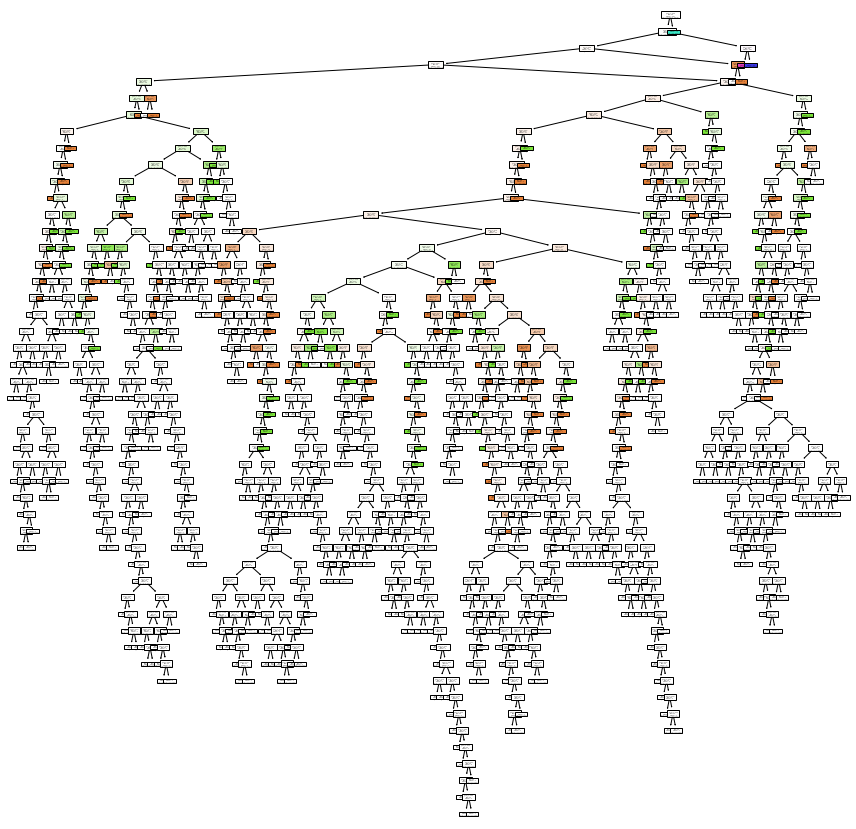

Accuracy:  0.6651131824234354
Confusion Matrix:
  [[ 69 219   0   0   0]
 [284  28   0   0   0]
 [  0   0 291   0   0]
 [  0   0   0 315   0]
 [  0   0   0   0 296]]


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15, 15))
tree.plot_tree(clf, filled=True)
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

## KNN

In [ ]:
print("KNN")
knn = neighbors.KNeighborsClassifier()
knn_fit = knn.fit(x_train, y_train)
y_pred = knn_fit.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, y_pred))

KNN
Accuracy:  0.7190412782956058
Confusion Matrix:
  [[ 96 192   0   0   0]
 [229  83   0   0   0]
 [  0   1 290   0   0]
 [  0   0   0 315   0]
 [  0   0   0   0 296]]


## KMeans

In [ ]:
kmean = KMeans(n_clusters=4)
kmean.fit(x_train, y_train)
y_pred = kmean.predict(x_test)
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ", metrics.confusion_matrix(y_test, y_pred))

Accuracy:  0.20772303595206393
Confusion Matrix:
  [[  0 288   0   0   0]
 [  0 312   0   0   0]
 [  0   0   0 291   0]
 [315   0   0   0   0]
 [  0   0 296   0   0]]


# Classification Spanish Text

### Codepages

In [ ]:
CODEPAGES = ["utf-8", "utf-32", "utf-16", "cp1252"]

## Partition File

In [ ]:
with open(FOLDERIN+FILEIN_SPANISH, "r", encoding="cp1252") as archive:
  partition_file(archive, FOLDERTEMP_SPANISH)

/usr/local/lib/python3.7/dist-packages/bs4/__init__.py:336: UserWarning: "https://gutenberg.org/license).
" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


End... Total set of files 845


## Arrow definition

In [ ]:
ARROW = (1,257)

## Build dataset array

In [ ]:
array = np.zeros(ARROW, float)

allfiles = glob(FOLDERTEMP_SPANISH+"*")

array = fill_np_matrix(array, allfiles)

Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-8595.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/cp1252597.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-16600.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-32603.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-8606.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/cp1252608.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-16611.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-32614.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-8617.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/cp1252619.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-16622.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-32625.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/utf-8628.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish/cp1252630.temp
Reading file /content/drive/MyDrive/UFRJ/BMT/Spanish

In [ ]:
for row in array:
  s = sum(row[1:])
  if s > 0:
      row[1:] =  100 * row[1:] / s

## Test and Train

In [ ]:
y = array[:,0]
X = array[:,1:]
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

## Decision Tree

Decision Tree


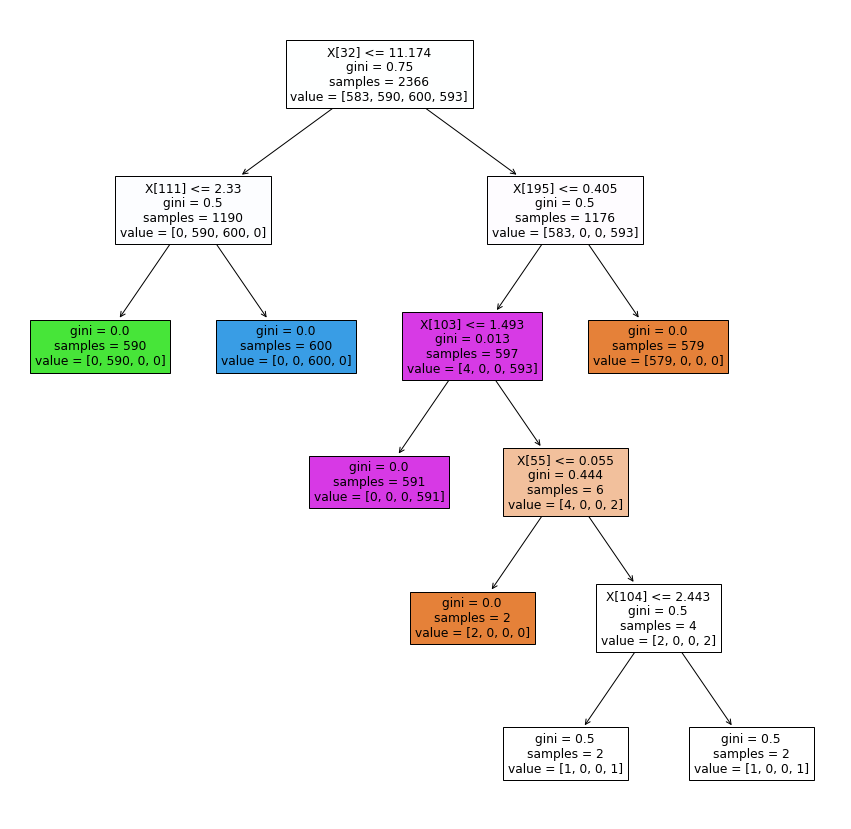

Accuracy:  0.995069033530572
Confusion Matrix:
  [[259   0   0   3]
 [  0 255   0   0]
 [  0   0 245   0]
 [  2   0   0 250]]


In [ ]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print("Decision Tree")
plt.figure(figsize=(15,15))
tree.plot_tree(clf,filled=True)
plt.show()

print("Accuracy: ",metrics.accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n ",metrics.confusion_matrix(y_test, y_pred))

## KNN

In [ ]:
accuracy = 0
confusion_matrix = []
for n_neighbors in range(1, 21):
  knn = neighbors.KNeighborsClassifier(n_neighbors)
  knn_fit = knn.fit(x_train, y_train)
  y_pred = knn_fit.predict(x_test)
  current_accuracy = metrics.accuracy_score(y_test, y_pred)
  if current_accuracy > accuracy:
    print(f"Number of neighbors: {n_neighbors}")
    accuracy = current_accuracy
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Confusion Matrix:\n ", confusion_matrix)

Number of neighbors: 1
Number of neighbors: 2
Number of neighbors: 3
Number of neighbors: 4
Number of neighbors: 10
Accuracy:  1.0
Confusion Matrix:
  [[262   0   0   0]
 [  0 255   0   0]
 [  0   0 245   0]
 [  0   0   0 252]]
